<a href="https://colab.research.google.com/github/onyxcollc/ADA_XLM_DOGE_Analysis/blob/main/ADA_XLM_DOGE_Analysis.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
#Import the libraries 

import numpy as np
import pandas as pd

In [4]:
#Load the data
from google.colab import files 
upload = files.upload()

Saving ADA-USD.csv to ADA-USD.csv
Saving DOGE-USD.csv to DOGE-USD.csv
Saving XLM-USD.csv to XLM-USD.csv


In [5]:
# Store the data into dataframes 
ADA_df = pd.read_csv('ADA-USD.csv')
XLM_df = pd.read_csv('XLM-USD.csv')
DOGE_df = pd.read_csv('DOGE-USD.csv')

In [6]:
# Print first 5 rows of XLM, ADA & DOGE
XLM_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-01,0.202160,0.203534,0.177947,0.184425,0.184425,917146767
1,2020-12-02,0.184473,0.187982,0.178353,0.185151,0.185151,588076706
2,2020-12-03,0.185249,0.189407,0.180338,0.184304,0.184304,489435452
3,2020-12-04,0.184328,0.188008,0.160720,0.162855,0.162855,575389419
4,2020-12-05,0.162703,0.175897,0.160525,0.171718,0.171718,428643561


In [7]:
ADA_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-02,0.155956,0.159662,0.151429,0.158557,0.158557,1367595805
1,2020-12-03,0.158592,0.168009,0.155936,0.164212,0.164212,1287927035
2,2020-12-04,0.164209,0.164506,0.146964,0.148241,0.148241,1200621758
3,2020-12-05,0.148164,0.161383,0.146795,0.159668,0.159668,1036100099
4,2020-12-06,0.159659,0.162406,0.153430,0.158867,0.158867,886137949


In [8]:
DOGE_df.head(5)

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-12-01,0.003551,0.003572,0.003269,0.003335,0.003335,80163603
1,2020-12-02,0.003335,0.003436,0.003293,0.003374,0.003374,58705661
2,2020-12-03,0.003375,0.003500,0.003352,0.003428,0.003428,47907032
3,2020-12-04,0.003429,0.003447,0.003285,0.003298,0.003298,45062222
4,2020-12-05,0.003297,0.003414,0.003268,0.003397,0.003397,43386583


In [9]:
# Concatinat the datasets. 
crypto_df = pd.DataFrame({'XLM': XLM_df['Close'],
                          'ADA': ADA_df['Close'],
                          'DOGE': DOGE_df['Close']
})

In [10]:
# Show the new dataframe

crypto_df

,XLM,ADA,DOGE
0,0.184425,0.158557,0.003335
1,0.185151,0.164212,0.003374
2,0.184304,0.148241,0.003428
3,0.162855,0.159668,0.003298
4,0.171718,0.158867,0.003397
...,...,...,...
142,0.450346,1.155702,0.260967
143,0.450892,1.101355,0.248509
144,0.425746,1.088250,0.270212
145,0.416438,NaN,0.251111


In [11]:
# Get Statistics on data
crypto_df.describe()

,XLM,ADA,DOGE
count,147.000000,145.000000,147.000000
mean,0.349190,0.731861,0.055841
std,0.135329,0.462618,0.076520
min,0.126471,0.136394,0.003079
25%,0.245837,0.287003,0.008453
50%,0.385499,0.870951,0.050262
75%,0.431415,1.189140,0.058460
max,0.655356,1.481588,0.407318


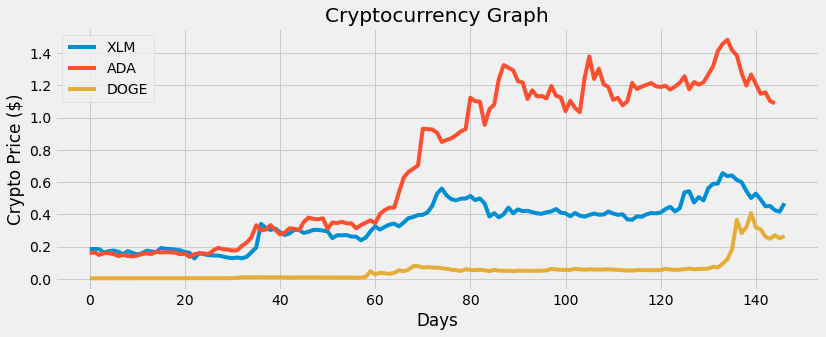

In [12]:
#Visulaize the Crypto closing price 
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')

my_crypto = crypto_df
plt.figure(figsize=(12.2,4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label = c)

plt.title('Cryptocurrency Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Price ($)')
plt.legend(my_crypto.columns.values, loc= 'upper left')


In [13]:
#Scale the data
from sklearn import preprocessing
min_max_scaler = preprocessing.MinMaxScaler(feature_range=(0,1.5))
scaled = min_max_scaler.fit_transform(my_crypto)
scaled

array([[1.64366545e-01, 2.47135357e-02, 9.49933084e-04],
       [1.66425593e-01, 3.10193177e-02, 1.09464945e-03],
       [1.64023370e-01, 1.32103622e-02, 1.29502596e-03],
       [1.03190675e-01, 2.59523905e-02, 8.12638068e-04],
       [1.28327519e-01, 2.50592108e-02, 1.17999500e-03],
       [1.39422559e-01, 1.97770730e-02, 1.14659892e-03],
       [1.19087325e-01, 5.05577634e-03, 9.75907817e-04],
       [7.46816416e-02, 1.31256161e-02, 3.71067611e-04],
       [1.29762614e-01, 6.24445247e-03, 2.93143413e-04],
       [9.82188945e-02, 3.40657184e-03, 9.64775789e-05],
       [7.00785615e-02, 8.99424172e-03, 0.00000000e+00],
       [9.21154882e-02, 1.95919696e-02, 3.11696793e-04],
       [1.37216030e-01, 2.40835151e-02, 6.56789671e-04],
       [1.22779999e-01, 1.99722122e-02, 5.64022769e-04],
       [1.13690122e-01, 3.47849455e-02, 4.71255866e-04],
       [1.84151564e-01, 3.02064238e-02, 1.25049785e-03],
       [1.68649139e-01, 3.18846204e-02, 2.41565015e-03],
       [1.66357526e-01, 3.15790

In [14]:
# Convert the scaled data into a dataframe
scaled_df = pd.DataFrame(scaled, columns = my_crypto.columns)

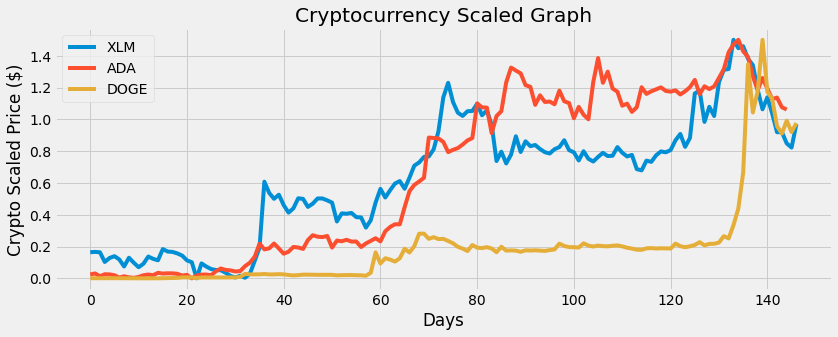

In [15]:
#Visualize the scaled data
my_crypto = scaled_df

plt.figure(figsize=(12.4,4.5))
for c in my_crypto.columns.values:
  plt.plot(my_crypto[c], label=c)

plt.title('Cryptocurrency Scaled Graph')
plt.xlabel('Days')
plt.ylabel('Crypto Scaled Price ($)')
plt.legend(my_crypto.columns.values, loc ='upper left')
plt.show()

In [16]:
 # Get the daily simle return 
 DSR = my_crypto.pct_change(1)
 DSR

,XLM,ADA,DOGE
0,NaN,NaN,NaN
1,0.012527,0.255155,0.152344
2,-0.014434,-0.574125,0.183051
3,-0.370878,0.964548,-0.372493
4,0.243596,-0.034416,0.452055
...,...,...,...
142,-0.114169,0.008594,-0.151254
143,0.001686,-0.053318,-0.048308
144,-0.077510,-0.013581,0.088428
145,-0.031102,0.000000,-0.071504


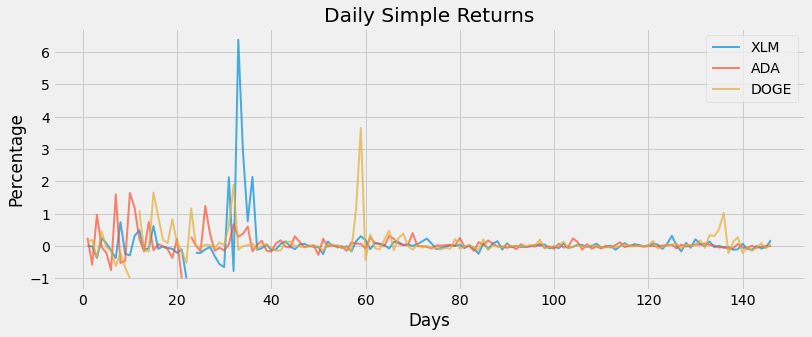

In [17]:
#Visualize the daily simple returns 
plt.figure(figsize=(12,4.5))

for c in DSR.columns.values:
  plt.plot(DSR.index, DSR[c],label = c, lw = 2, alpha = .7)

plt.title('Daily Simple Returns')
plt.ylabel('Percentage')
plt.xlabel('Days')
plt.legend(DSR.columns.values, loc= 'upper right')
plt.show()

In [34]:
 #Get the volatility 
 print('Volatility')
 DSR.std()

Volatility


XLM    NaN
ADA    NaN
DOGE   NaN
dtype: float64

In [35]:
#Get the mean / average daily simple return
print('Mean Return')
DSR.mean()

Mean Return


XLM     inf
ADA     inf
DOGE    inf
dtype: float64

In [36]:
#Get Correlation
DSR.corr()


,XLM,ADA,DOGE
XLM,1.000000,0.025127,0.058414
ADA,0.025127,1.000000,-0.060155
DOGE,0.058414,-0.060155,1.000000


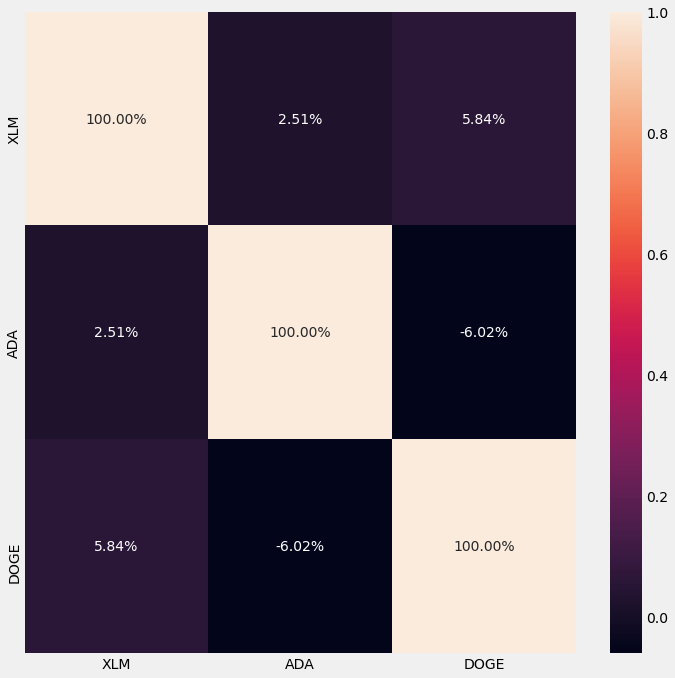

In [38]:
# Visualize 
import seaborn as sns
plt.subplots(figsize=(11,11))
sns.heatmap(DSR.corr(), annot= True, fmt='.2%')

In [39]:
daily_cum_return = (DSR+1).cumprod()

daily_cum_return


,XLM,ADA,DOGE
0,NaN,NaN,NaN
1,1.012527,1.255155,1.152344
2,0.997912,0.534540,1.363281
3,0.627808,1.050129,0.855469
4,0.780740,1.013987,1.242187
...,...,...,...
142,NaN,NaN,NaN
143,NaN,NaN,NaN
144,NaN,NaN,NaN
145,NaN,NaN,NaN


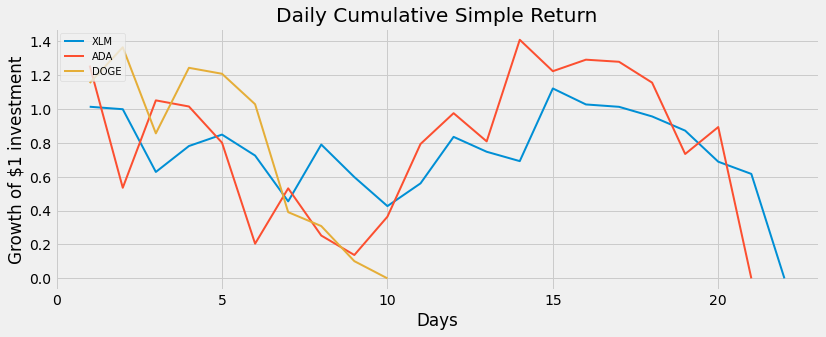

In [43]:
#Visualize the daily cumlative return

plt.figure(figsize=(12.2,4.5))
for c in daily_cum_return.columns.values:
  plt.plot(daily_cum_return.index, daily_cum_return[c], lw=2, label= c)

plt.title('Daily Cumulative Simple Return')
plt.xlabel('Days')
plt.ylabel('Growth of $1 investment') 
plt.legend(daily_cum_return.columns.values, loc = 'upper left', fontsize = 10)
plt.show()